# **TASK:** 

*	Load and preprocess the MNIST dataset using Python.

In [71]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
data = mnist.load_data()
(X_train, y_train), (X_test, y_test) = data
X_train[0].shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [72]:
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


*	Build a neural network using Python and NumPy with <br>
* * Different activation functions i.e., sigmoid, ReLu and hyperbolic tangent (tanh) function on hidden layers and softmax on output layer.



* * Different sizes of hidden layers i.e., 32, 64, 128 and 256.  
* *	Use accuracy as evaluation metric. <br>
*	Train and evaluate the performance of the neural network. 


In [73]:
from tensorflow import keras
from keras import layers
from keras.utils import to_categorical


In [74]:
activation_functions=['relu','sigmoid','tanh']
unit_sizes=[32,64,128,256]

In [75]:
activation_dictionary = {}
best_score = 0

for function in activation_functions:
    print("Activation Function: ", function)
    activation_dictionary[function] = []
    
    for size in unit_sizes:
        print("Current Hidden Layer  Size: ", size)
        
        model = keras.Sequential([
            layers.Dense(32, activation=function, input_dim=784),
            layers.Dense(size, activation=function),
            layers.Dense(10, activation="softmax"),
        ])
        
        model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            batch_size=64,
            epochs=10
        )
        
        _, score = model.evaluate(X_test, y_test)
        
        print("Test Accuracy: ", score)
        activation_dictionary[function].append(score)
        
        if score > best_score:
            best_score = score
            best_model = model


Activation Function:  relu
Current Hidden Layer  Size:  32
Epoch 1/10
938/938 [==============================] - 5s 4ms/step - loss: 0.4112 - accuracy: 0.8833 - val_loss: 0.2102 - val_accuracy: 0.9406
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1866 - accuracy: 0.9458 - val_loss: 0.1730 - val_accuracy: 0.9488
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1496 - accuracy: 0.9559 - val_loss: 0.1456 - val_accuracy: 0.9552
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1261 - accuracy: 0.9622 - val_loss: 0.1300 - val_accuracy: 0.9627
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1097 - accuracy: 0.9672 - val_loss: 0.1220 - val_accuracy: 0.9635
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0983 - accuracy: 0.9701 - val_loss: 0.1070 - val_accuracy: 0.9689
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0882 - accura



*   	Compare and visualize the results of the neural network.



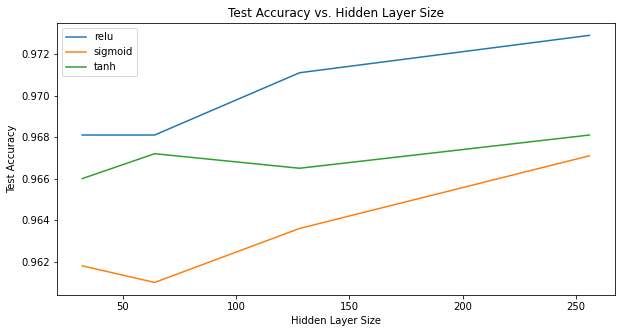

In [76]:
# Plot the results
plt.figure(figsize=(10,5))
for activation in activation_dictionary:
    plt.plot(unit_sizes, activation_dictionary[activation], label=activation)
plt.legend()
plt.title("Test Accuracy vs. Hidden Layer Size")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Test Accuracy")
plt.show()

* 	Save the best performing network model using model.save() method

In [77]:
model_json = best_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
